# <b>1. Importing relevant libraries<b>

In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt
from sklearn.metrics import plot_confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import ClusterCentroids
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import VarianceThreshold
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA
from tabulate import tabulate
from prettytable import PrettyTable
import datetime
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
import copy
from sklearn.metrics import confusion_matrix
from imblearn.datasets import fetch_datasets
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV



# <b>2. Loading and exploring dataset<b>

In [5]:
train_data = pd.read_csv("Train_Set.csv")
test_data = pd.read_csv("Test_Set.csv")

In [6]:
train_data.head() # Looking at first five rows of the training data

,account_id,week_start_date,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,...,feature54,feature55,feature56,feature57,feature58,feature59,feature60,feature61,feature62,Label
0,100559.0,2018-09-03,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,101026.0,2018-09-03,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,101026.0,2018-09-10,0.0,0.0,86.666667,0.0,0.0,0.0,0.0,0.0,...,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,101026.0,2018-09-17,0.0,0.0,-0.076046,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,101026.0,2018-09-24,0.0,0.0,-0.987654,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [7]:
train_data.describe() # Getting summaries of all columns in the dataset

,account_id,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature54,feature55,feature56,feature57,feature58,feature59,feature60,feature61,feature62,Label
count,114706.000000,114706.000000,114706.000000,114706.000000,114706.000000,114706.000000,114706.000000,114706.000000,114706.000000,114706.000000,...,114706.000000,114706.000000,114706.000000,114706.000000,114706.000000,114706.000000,114706.000000,114706.000000,114706.000000,114706.000000
mean,130757.085715,0.003826,0.000253,1.220189,0.000076,0.000068,0.001619,0.011936,0.000265,0.027169,...,0.000612,0.042691,0.015129,0.000111,0.023753,0.002694,0.002593,0.001441,0.041088,0.009381
std,41252.322475,0.112332,0.042883,14.874235,0.013079,0.012731,0.099576,0.484970,0.026294,2.321826,...,0.106045,0.533951,0.772402,0.018222,0.749735,0.136656,0.125907,0.107580,1.737335,0.096398
min,100000.000000,-0.894737,-0.705882,-0.999442,-0.500000,-0.500000,-0.916667,-0.992701,-0.700000,-0.998079,...,-0.782609,-0.975000,-0.993750,-0.750000,-0.989455,-0.926471,-0.989691,-0.907514,-0.996314,0.000000
25%,101631.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,105252.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,173684.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,239955.000000,10.012658,12.000000,1792.000000,1.000000,1.000000,20.000000,87.000000,2.333333,519.500000,...,33.951456,48.206349,159.000000,3.000000,108.000000,21.000000,19.250000,23.800000,445.500000,1.000000


In [8]:
print('Before deletion : Number of rows are :-',train_data.shape[0], ',and number of columns are :-',train_data.shape[1])

for col in train_data:
    if len(train_data[col].unique()) == 1:
        del train_data[col]
        
# Removing all single-value columns as they have no variance and provide no information in explaining the outcome variable
        
print('After deletion : Number of rows are :-',train_data.shape[0], ',and number of columns are :-',train_data.shape[1])

# There are no features with constant value

Before deletion : Number of rows are :- 114706 ,and number of columns are :- 65
After deletion : Number of rows are :- 114706 ,and number of columns are :- 65


In [9]:
train_data.info()

print('\n'+'\033[1m' +"Are there any Null values?", train_data.isnull().sum().any())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114706 entries, 0 to 114705
Data columns (total 65 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   account_id       114706 non-null  float64
 1   week_start_date  114706 non-null  object 
 2   feature1         114706 non-null  float64
 3   feature2         114706 non-null  float64
 4   feature3         114706 non-null  float64
 5   feature4         114706 non-null  float64
 6   feature5         114706 non-null  float64
 7   feature6         114706 non-null  float64
 8   feature7         114706 non-null  float64
 9   feature8         114706 non-null  float64
 10  feature9         114706 non-null  float64
 11  feature10        114706 non-null  float64
 12  feature11        114706 non-null  float64
 13  feature12        114706 non-null  float64
 14  feature13        114706 non-null  float64
 15  feature14        114706 non-null  float64
 16  feature15        114706 non-null  floa

#### Observations:

#### There are no missing values. Hence, we do not need to drop/fill any values.

#### All variables are already in integer/float form (Except date and ID which will be dealt with later). Hence, no type transformation is required.

In [10]:
instances = {}
new_column=[]
numbers =0

for number in train_data["account_id"]:
    numbers+=1
    
    if number not in instances:
        instances[number] = 1
        new_column.append(instances[number])
        
    else:
        instances[number] +=1
        new_column.append(instances[number])
        
instance_list =list(instances.values())
#Calculation of the number of instances of every user

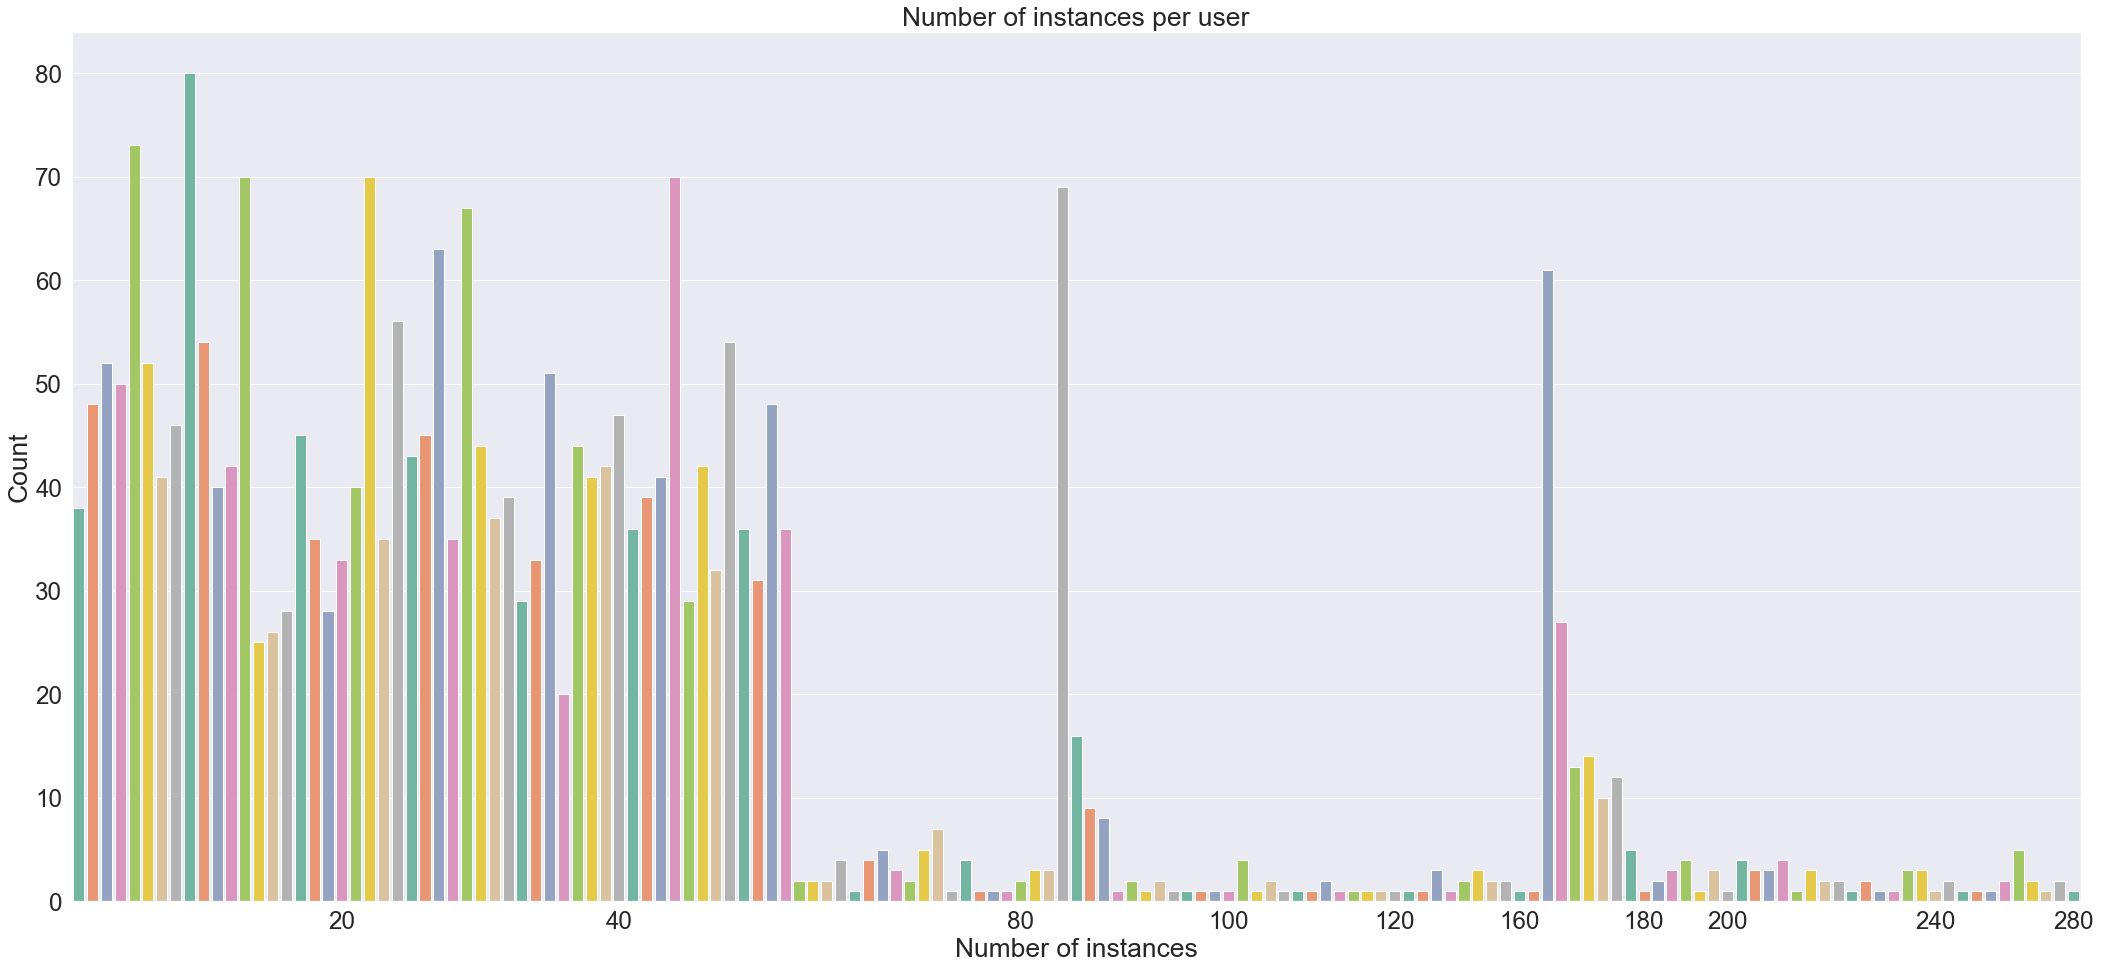

In [11]:

plt.figure(figsize = (36,16))
sns.set(font_scale=2.2)

ax = sns.countplot(x=instance_list,palette="Set2")


for label in ax.get_xticklabels():
    if np.int(label.get_text()) % 20 == 0:  
        label.set_visible(True)
    else:
        label.set_visible(False)

ax.set(xlabel='Number of instances', ylabel='Count')
ax.set_title("Number of instances per user")
plt.show()

#### Very few users are one-time users. Distribution looks trimodal, and the range of number of instances is vast, scaling from 0 to around 280

In [12]:
len(train_data["week_start_date"].unique()),len(train_data["account_id"].unique())

(83, 2690)

#### Since there are 83 week start dates and 2690 account IDs, using them as categorical variables would offer little help in explaining the Label. Thus, we drop them

In [13]:
train_data =train_data.drop("account_id", axis=1)
train_data= train_data.drop("week_start_date",axis=1)
test_data=test_data.drop("account_id",axis=1)
test_data=test_data.drop("week_start_date",axis=1)

In [14]:
X_train=train_data.drop(["Label"],axis=1)
y_train=train_data["Label"]

X_test = test_data.drop(["Label"], axis=1)
y_test = test_data["Label"]

#Splitting train and test data into features and label

Text(0, 0.5, 'Frequency')

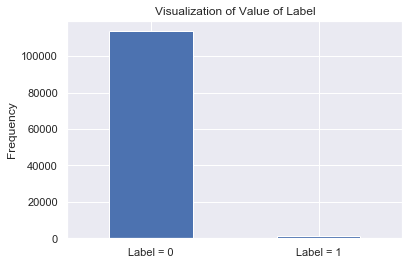

In [15]:
sns.set(font_scale=1)

LABELS = ["Label = 0", "Label = 1"]

count_classes = pd.value_counts(y_train, sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Visualization of Value of Label")

plt.xticks(range(2), LABELS)

plt.ylabel("Frequency")

In [16]:
print('Label = 0:', round(y_train.value_counts()[0]/len(y_train) * 100,2), '% of the dataset')
print('Label = 1:', round(y_train.value_counts()[1]/len(y_train) * 100,2), '% of the dataset')

Label = 0: 99.06 % of the dataset
Label = 1: 0.94 % of the dataset


#### We notice that the Label is highly imbalanced, and this can be problematic in modelling. We will mitigate this problem by balancing the dataset later

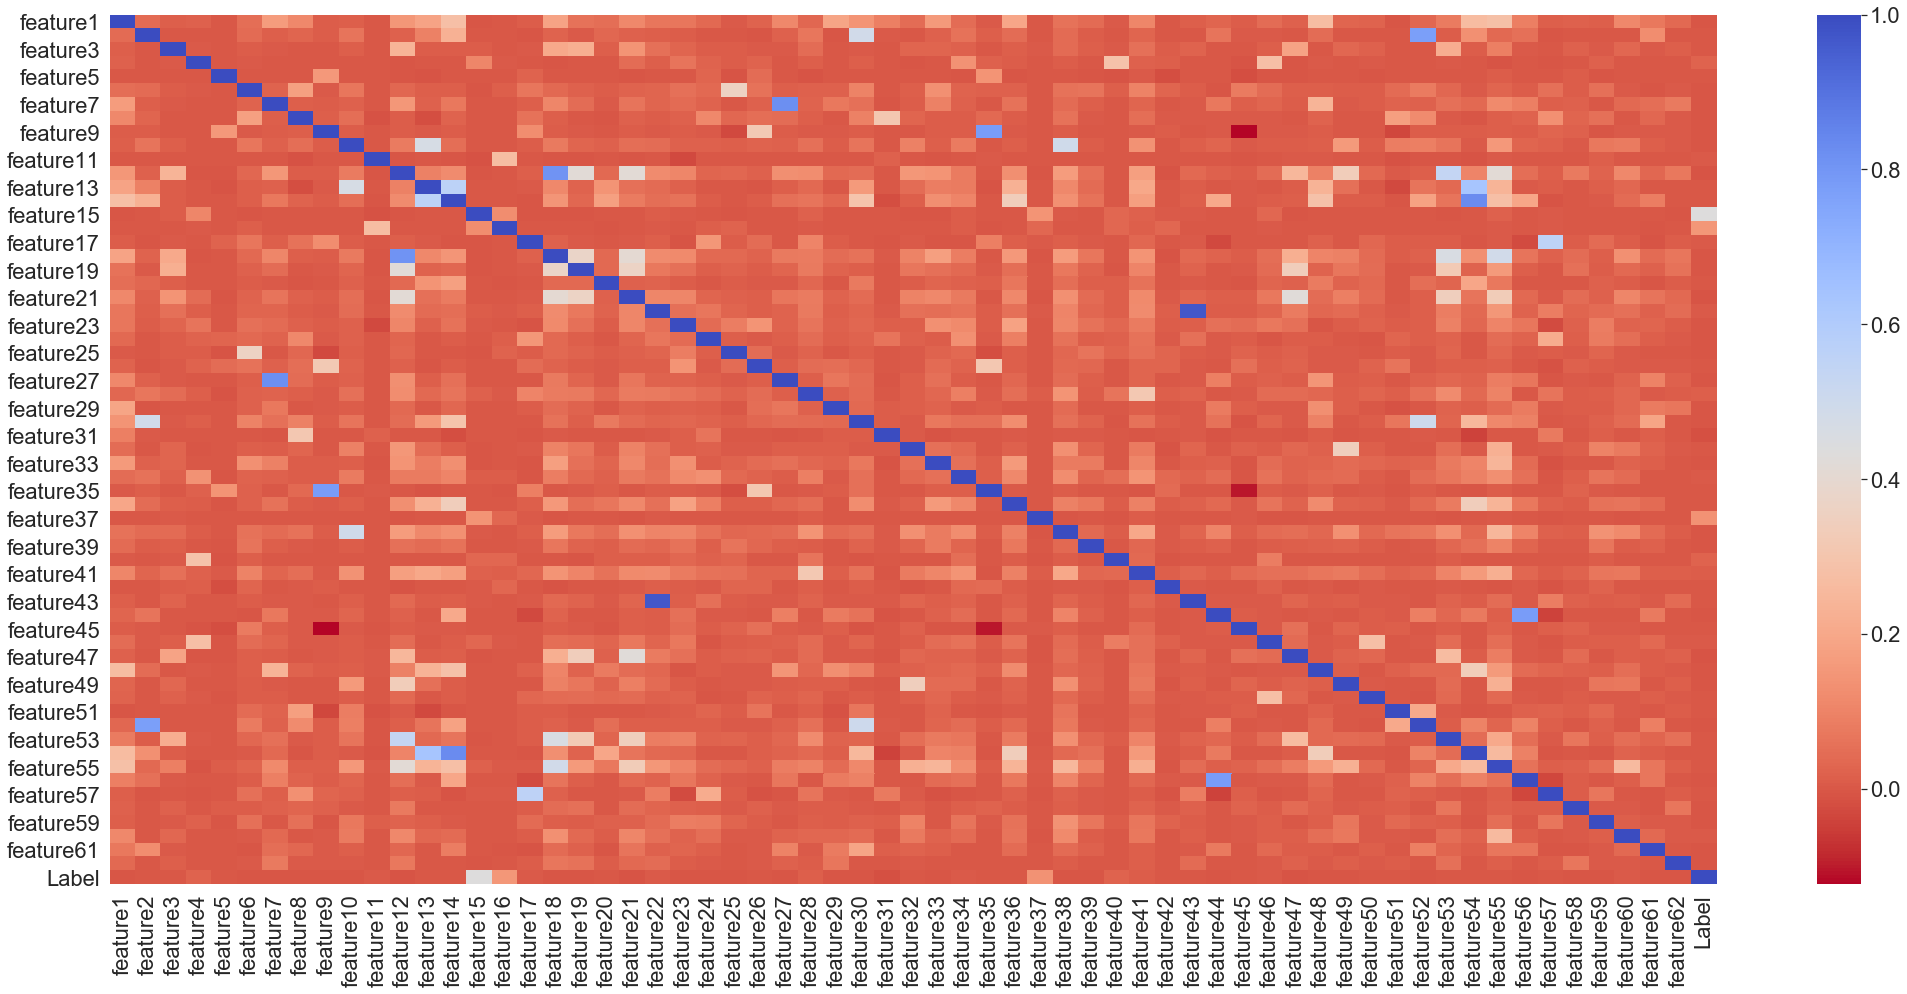

In [17]:
plt.figure(figsize = (36,16)) #Checking for correlation
sns.set(font_scale=2)
corr = train_data.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':200})

#### Some independent features seem to be highly correlated. 

In [18]:
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(train_data, 20))

Top Absolute Correlations
feature22  feature43    0.973133
feature14  feature54    0.832028
feature7   feature27    0.820672
feature12  feature18    0.810231
feature9   feature35    0.782988
feature44  feature56    0.782817
feature2   feature52    0.775452
feature13  feature54    0.633117
           feature14    0.562480
feature17  feature57    0.558537
feature12  feature53    0.537302
feature30  feature52    0.502886
feature10  feature38    0.493461
feature18  feature55    0.489792
feature2   feature30    0.488084
feature10  feature13    0.466674
feature18  feature53    0.458910
feature15  Label        0.434853
feature21  feature47    0.423903
feature12  feature19    0.419068
dtype: float64


In [19]:
#Correlation with Label
cor_target = abs(corr["Label"])
relevant_features = cor_target[cor_target>0.5]
relevant_features

Label    1.0
Name: Label, dtype: float64

#### There are a lot of features that are highly correlated with each other, and there is no feature which is highly correlated with the Output variable. We will tackle this problem later during feature selection

# <b>3. Scaling Features<b>

In [24]:
scaler = StandardScaler()

In [25]:
def scaleColumns(df, testdf):

    for col in df:
        df_mean = df[col].mean()
        df_sd = df[col].std()
        df[col] = pd.DataFrame(scaler.fit_transform(pd.DataFrame(df[col])),columns=[col])
        testdf[col] =(testdf[col] - df_mean)/df_sd
        
    return df, testdf

In [26]:
X_train_scaled, X_test_scaled  = scaleColumns(X_train, X_test)

#### Standardising all variables as their magnitude varies as seen before. The test data has been standardised and the test data has also been standardised using the mean and the variance obtained from the train data. The test data hasn't been used alongwith the train data for standardising so as to avoid the influx of future information.

#### Furthermore, the test data has not been standardised on its own but instead using the metric obtained from the train data so as to ensure that the two datasets are not fundamentally different, and the mdoel receives similar data to predict as it has been trained on.

In [27]:
X_train_scaled.describe()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature53,feature54,feature55,feature56,feature57,feature58,feature59,feature60,feature61,feature62
count,1.147060e+05,1.147060e+05,1.147060e+05,1.147060e+05,1.147060e+05,1.147060e+05,1.147060e+05,1.147060e+05,1.147060e+05,1.147060e+05,...,1.147060e+05,1.147060e+05,1.147060e+05,1.147060e+05,1.147060e+05,1.147060e+05,1.147060e+05,1.147060e+05,1.147060e+05,1.147060e+05
mean,-1.290065e-14,1.041723e-14,-1.326004e-14,-3.570049e-15,-2.323776e-15,-2.575220e-15,-1.988462e-14,8.643100e-16,1.080420e-15,2.100397e-14,...,2.187736e-14,-3.032797e-15,-5.002022e-14,-1.253728e-14,-3.070312e-16,-1.296347e-14,2.992009e-15,1.418648e-14,2.900208e-14,3.532877e-15
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,...,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00
min,-7.999232e+00,-1.646662e+01,-1.492272e-01,-3.823658e+01,-3.927861e+01,-9.222039e+00,-2.071553e+00,-2.663230e+01,-4.415717e-01,-9.558889e+00,...,-4.528151e-01,-7.385743e+00,-1.905970e+00,-1.306164e+00,-4.116559e+01,-1.351428e+00,-6.799315e+00,-7.881100e+00,-8.449169e+00,-5.971252e-01
25%,-3.406002e-02,-5.903404e-03,-8.203410e-02,-5.845725e-03,-5.377023e-03,-1.625823e-02,-2.461164e-02,-1.009306e-02,-1.170181e-02,-1.700709e-02,...,-1.226001e-01,-5.775599e-03,-7.995243e-02,-1.958731e-02,-6.107093e-03,-3.168185e-02,-1.971688e-02,-2.059856e-02,-1.339484e-02,-2.365009e-02
50%,-3.406002e-02,-5.903404e-03,-8.203410e-02,-5.845725e-03,-5.377023e-03,-1.625823e-02,-2.461164e-02,-1.009306e-02,-1.170181e-02,-1.700709e-02,...,-1.226001e-01,-5.775599e-03,-7.995243e-02,-1.958731e-02,-6.107093e-03,-3.168185e-02,-1.971688e-02,-2.059856e-02,-1.339484e-02,-2.365009e-02
75%,-3.406002e-02,-5.903404e-03,-8.203410e-02,-5.845725e-03,-5.377023e-03,-1.625823e-02,-2.461164e-02,-1.009306e-02,-1.170181e-02,-1.700709e-02,...,-1.226001e-01,-5.775599e-03,-7.995243e-02,-1.958731e-02,-6.107093e-03,-3.168185e-02,-1.971688e-02,-2.059856e-02,-1.339484e-02,-2.365009e-02
max,8.910113e+01,2.798262e+02,1.203953e+02,7.645562e+01,7.854109e+01,2.008371e+02,1.793687e+02,8.873058e+01,2.237356e+02,1.969274e+02,...,1.008560e+02,3.201551e+02,9.020276e+01,2.058327e+02,1.646318e+02,1.440199e+02,1.536512e+02,1.528703e+02,2.212188e+02,2.564047e+02



#### All features' means are close to 0 and standard deviations are close to 1. As such, we can affirm that all features indeed follow a Standard Normal Distrubution, and are hence normalised

In [28]:
X_train.shape

(114706, 62)

In [29]:
X_train_final, X_validation, y_train_final, y_validation = train_test_split(X_train_scaled,y_train, test_size = 0.2, random_state = 42)

# <b>4. Modelling<b>

### How does the imbalance of the label affect our modelling? 

#### To explore this, we will create a logistic regression without balancing the data

In [30]:
model1 = LogisticRegression(max_iter=5000) #Creating an instance of the model
model1.fit(X_train_final, y_train_final) #Fitting the model
predictions = model1.predict(X_validation) # Generating predictions for the test data using the model
predictions_list = pd.Series(predictions.tolist(), name = "Predictions")
dt = confusion_matrix(y_validation, predictions)
print(dt) # Creating a confusion matrix

[[22696    30]
 [  150    66]]


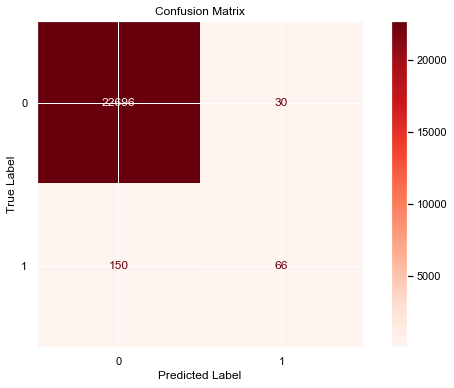

In [31]:
sns.set(font_scale=1)
matrix = plot_confusion_matrix(model1, X_validation, y_validation, cmap = plt.cm.Reds)
matrix.ax_.set_title("Confusion Matrix", color='black')
plt.xlabel('Predicted Label', color = 'black')
plt.ylabel('True Label', color = 'black')
plt.gcf().axes[0].tick_params(colors ='black')
plt.gcf().axes[1].tick_params(colors ='black') 
plt.gcf().set_size_inches(10,6)
#Creating a confusion matrix with the fitted model on the test data

In [32]:
def useful_logr_stats(confusion_matrix):
    """Function to obtain accuracy, recall, precision, and f1 score from a confusion matrix.
    Only for Binary classification. The Columns should segregate the predictions 
    and the rows should segregate the True labels"""
    print("The accuracy is: {}". format((confusion_matrix[0][0]+confusion_matrix[1][1])/(confusion_matrix[0][1]+confusion_matrix[1][1]+confusion_matrix[0][0]+confusion_matrix[1][0])))

    print("The precision is: {}". format(confusion_matrix[1][1]/(confusion_matrix[1][0]+confusion_matrix[1][1])))
    #How trustable the model is when it says that the label = 1

    print("The recall is: {}". format(confusion_matrix[1][1]/(confusion_matrix[0][1]+confusion_matrix[1][1])))
    # How well the model is able to detect the Label


    precision =confusion_matrix[1][1]/(confusion_matrix[1][0]+confusion_matrix[1][1])
    recall = confusion_matrix[1][1]/(confusion_matrix[0][1]+confusion_matrix[1][1])

    print("The F1 score is: {}". format((2*precision*recall)/(precision+recall)))

In [105]:
useful_logr_stats(dt)

The accuracy is: 0.9921541278005405
The precision is: 0.3055555555555556
The recall is: 0.6875
The F1 score is: 0.42307692307692313


#### Our classifier is clearly biased in the favour of the majority class considering it is an imbalanced dataset. (very few Label = 1 and majority label = 0)

#### Althought the accuracy seems to be quite high, it is misleading as the classifier will always tend to predict the majority

#### The F1 score, precision as well as the recall serve as better metrics to evaluate our model in this problem. Thus, to improve these metrics, it is important to balance the dataset

# <b>5. Balancing the dataset<b>

### 1. Random Undersampling 




In [33]:
rus = RandomUnderSampler(replacement=True) 
X_train_res, y_train_res = rus.fit_resample(X_train_final, y_train_final)
print('Original dataset {}'.format(Counter(y_train_final)))
print('Resampled dataset {}'.format(Counter(y_train_res)))

Original dataset Counter({0: 90904, 1: 860})
Resampled dataset Counter({0: 860, 1: 860})


In [34]:

model2= LogisticRegression(max_iter=5000)
model2.fit(X_train_res, y_train_res)
predictions_undersample = model2.predict(X_validation)
df_confusion_undersample = pd.crosstab(y_validation,predictions_undersample)
useful_logr_stats(df_confusion_undersample)

The accuracy is: 0.9430302501961468
The precision is: 0.08390541571319603
The recall is: 0.5092592592592593
The F1 score is: 0.1440733464309103


### 2. Random Oversampling

In [35]:
ros =  RandomOverSampler()
X_train_ros, y_train_ros = ros.fit_resample(X_train_final, y_train_final)
print('Original dataset {}'.format(Counter(y_train_final)))
print('Resampled dataset {}'.format(Counter(y_train_ros)))

Original dataset Counter({0: 90904, 1: 860})
Resampled dataset Counter({0: 90904, 1: 90904})


In [36]:
model3= LogisticRegression(max_iter=5000)
model3.fit(X_train_ros, y_train_ros)
predictions_oversample = model3.predict(X_validation)
df_confusion_oversample = pd.crosstab(y_validation,predictions_oversample)
useful_logr_stats(df_confusion_oversample)

The accuracy is: 0.9738035044895824
The precision is: 0.17970049916805325
The recall is: 0.5
The F1 score is: 0.26438188494492043


### 3. SMOTE

In [37]:
sm = SMOTE()
X_train_smote, y_train_smote = sm.fit_resample(X_train_final, y_train_final)
print('Original dataset {}'.format(Counter(y_train_final)))
print('Resampled dataset {}'.format(Counter(y_train_smote)))

Original dataset Counter({0: 90904, 1: 860})
Resampled dataset Counter({0: 90904, 1: 90904})


In [38]:
model4= LogisticRegression(max_iter=5000)
model4.fit(X_train_smote, y_train_smote)
predictions_smote = model4.predict(X_validation)
df_confusion_smote = pd.crosstab(y_validation,predictions_smote)
useful_logr_stats(df_confusion_smote)

The accuracy is: 0.9736727399529248
The precision is: 0.17880794701986755
The recall is: 0.5
The F1 score is: 0.2634146341463415


#### SMOTE performs better than Random Oversampling and Random Undersampling as they can lead to overfitting and underfitting respectively, we will use this moving forward

# Modelling

### 1. Random Forest Classifier for feature selection + Logistic regression

In [39]:
forest = RandomForestClassifier(n_estimators = 500, random_state=1)
forest.fit(X_train_smote, y_train_smote)
importances = forest.feature_importances_

In [40]:
features = train_data.drop(['Label'], axis=1).columns

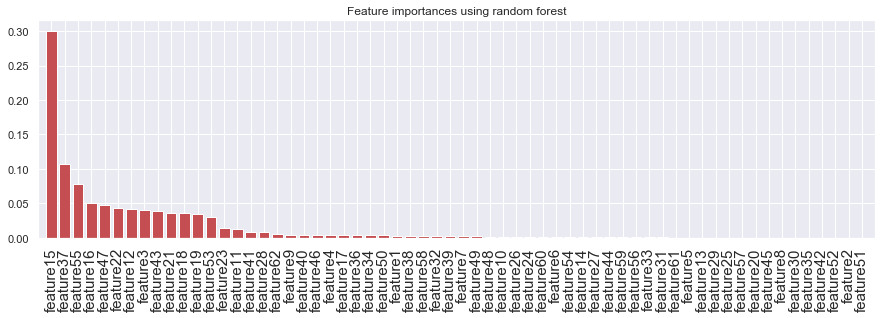

In [41]:
indices=np.argsort(importances)[::-1]
plt.figure(figsize=(15,4))
plt.title("Feature importances using random forest")
plt.bar(range(X_train_smote.shape[1]), importances[indices], color="r", align ="center")
plt.xticks(range(X_train_smote.shape[1]), features[indices], rotation='vertical', fontsize=15)
plt.xlim([-1,X_train_smote.shape[1]])
plt.show()

#plotting  important features

In [45]:
features1 = features[indices]

We select the first 24 features (once which have a significant importance)

In [52]:
no_of_features = []
f1_score = []
for i in range(1,63):
    X_train_RFC, X_validation_RFC = X_train_smote[(features1)[0:i]], X_validation[(features1)[0:i]]
   
    model= LogisticRegression(max_iter=5000)
    model.fit(X_train_RFC, y_train_smote)
    predictions = model.predict(X_validation_RFC)
    df_cm = pd.crosstab(y_validation,predictions)
    
    precision =df_cm[1][1]/(df_cm[1][0]+df_cm[1][1])
    recall = df_cm[1][1]/(df_cm[0][1]+df_cm[1][1])

    f1 = (2*precision*recall)/(precision+recall)
    f1_score.append(f1)
    no_of_features.append(i)

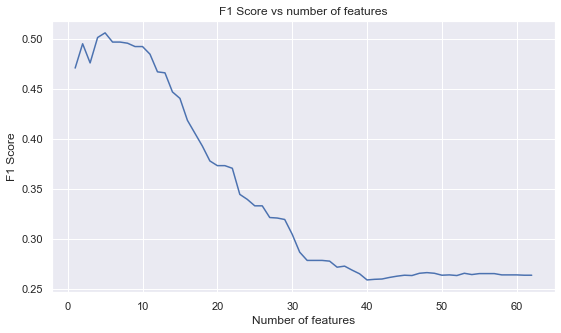

In [53]:
plt.figure(figsize = (9,5)) 
plt.plot(no_of_features,f1_score)
plt.ylabel('F1 Score')
plt.xlabel('Number of features')
plt.title('F1 Score vs number of features')
plt.show()

### The f1 score is the highest with the four most important features:
### feature 15, 37, 55 and 16

In [67]:
(features1)[0:4]

Index(['feature15', 'feature37', 'feature55', 'feature16'], dtype='object')

In [71]:
X_train_smote_RFC, X_test_RFC = X_train_smote[(features1)[0:4]], X_test_scaled[(features1)[0:4]]

In [72]:
model_final_1= LogisticRegression(max_iter=5000)
model_final_1.fit(X_train_smote_RFC, y_train_smote)
predictions = model_final_1.predict(X_test_RFC)


In [73]:
df_cm = pd.crosstab(y_test,predictions)
useful_logr_stats(df_cm)

The accuracy is: 0.9904118838622552
The precision is: 0.48717948717948717
The recall is: 0.48014440433212996
The F1 score is: 0.48363636363636364


### 2. Lasso Regression for feature selection + Logistic Regression

In [80]:
alpha = []
f1_score = []
no_features = []

for i in range(1,1000,10):
    sel_ = SelectFromModel(LogisticRegression(C=i/10, penalty='l1',solver='liblinear'))
    sel_.fit(X_train_smote, y_train_smote)
    selected_feat = X_train_smote.columns[(sel_.get_support())]
    X_train_lasso = sel_.transform(X_train_smote)
    X_validation_lasso = sel_.transform(X_validation)
  
    
    model= LogisticRegression(max_iter=5000)
    model.fit(X_train_lasso, y_train_smote)
    predictions = model.predict(X_validation_lasso)
    df_cm = pd.crosstab(y_validation,predictions)
    
    precision =df_cm[1][1]/(df_cm[1][0]+df_cm[1][1])
    recall = df_cm[1][1]/(df_cm[0][1]+df_cm[1][1])

    f1 = (2*precision*recall)/(precision+recall)
    f1_score.append(f1)
    alpha.append(i)
    no_features.append(len(selected_feat))

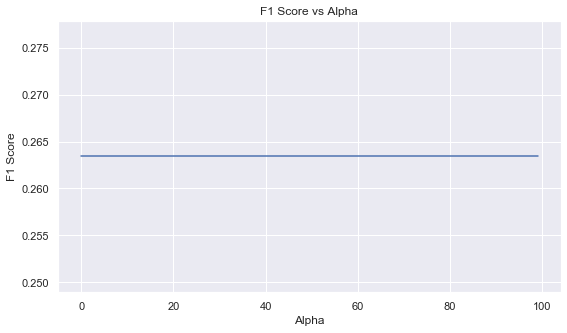

In [83]:
plt.figure(figsize = (9,5)) 
plt.plot(f1_score)
plt.ylabel('F1 Score')
plt.xlabel('Alpha')
plt.title('F1 Score vs Alpha')
plt.show()

#### Lasso does not do a great job in feature selection.

### Random Forest Classifier

In [105]:
rf = RandomForestClassifier()
param_rf = {'n_estimators':[100, 350, 500], 'min_samples_leaf':[2, 10, 30]}
grid_rf = GridSearchCV(rf, param_grid=param_rf, cv=3)
grid_rf.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': [2, 10, 30],
                         'n_estimators': [100, 350, 500]})

In [106]:
grid_rf.best_params_

{'min_samples_leaf': 2, 'n_estimators': 100}

In [110]:
rf = RandomForestClassifier(n_estimators= 100,min_samples_leaf= 2)
rf.fit(X_train_smote, y_train_smote)
predictions = rf.predict(X_test_scaled)
df_cm = pd.crosstab(y_test,predictions)
useful_logr_stats(df_cm)

The accuracy is: 0.474544226873734
The precision is: 0.015958457349122917
The recall is: 0.9097472924187726
The F1 score is: 0.031366691560866314


### Plotting a Precision-Recall curve of the best model

In [111]:
X_train_smote_RFC, X_test_RFC = X_train_smote[(features1)[0:4]], X_test_scaled[(features1)[0:4]]
model_final_1= LogisticRegression(max_iter=5000)
model_final_1.fit(X_train_smote_RFC, y_train_smote)

LogisticRegression(max_iter=5000)

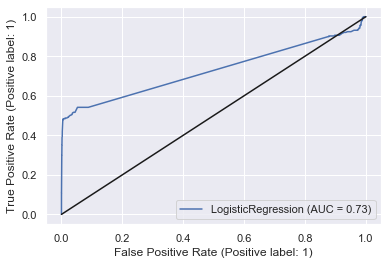

In [112]:
plot_roc_curve(model_final_1,X_test_RFC,y_test)
plt.plot([0,1],[0,1], c='k')

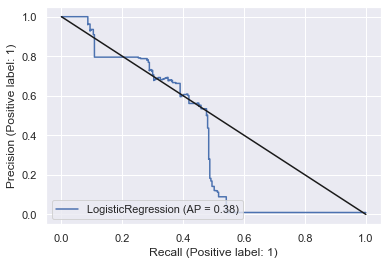

In [113]:
plot_precision_recall_curve(model_final_1,X_test_RFC,y_test)
plt.plot([1,0],[0,1], c='k')

### Feature 15, 37, 55 and 16 are the most important features in the customer journey that affect the label